## Preprocessing

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

import tensorflow as tf

In [7]:
labels = np.load("../labels.npy")

In [8]:
labels.shape, labels[0]

((1217, 2), array(['img/0_1-20-0.jpg', 'Red-White Team'], dtype='<U21'))

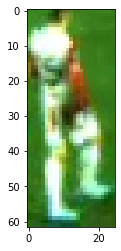

In [10]:
img = mpimg.imread("../" + labels[0][0])
plt.imshow(img)
plt.show()

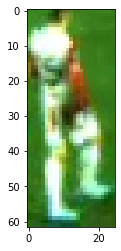

In [11]:
img = img / 255.0
plt.imshow(img)
plt.show()

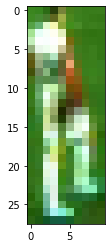

In [12]:
resized_image = cv2.resize(img, (10, 28))
plt.imshow(resized_image)
plt.show()

In [13]:
y = []
x = []

In [14]:
for file_name, label in labels:
  img = cv2.imread("../" + file_name)
  img = img / 255.0
  resized_image = cv2.resize(img, (10, 28))
  x.append(resized_image)
  if label == "Blue-Black Team":
    y.append([1, 0, 0])
  elif label == "Referee":
    y.append([0, 1, 0])
  elif label == "Red-White Team":
    y.append([0, 0, 1])

In [15]:
X = np.array(x)
y = np.array(y)

In [16]:
X.shape, y.shape

((1217, 28, 10, 3), (1217, 3))

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [25]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(64, (3,3), input_shape=(28,10,3), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 8, 64)         1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 4, 64)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 2, 128)        73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 1, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 640)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               82048     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

In [27]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [28]:
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25
35/35 [==============================] - 2s 25ms/step - loss: 0.4342 - accuracy: 0.8283 - val_loss: 0.1078 - val_accuracy: 0.9672
Epoch 2/25
35/35 [==============================] - 1s 19ms/step - loss: 0.0915 - accuracy: 0.9817 - val_loss: 0.0184 - val_accuracy: 1.0000
Epoch 3/25
35/35 [==============================] - 1s 19ms/step - loss: 0.0532 - accuracy: 0.9918 - val_loss: 0.0253 - val_accuracy: 0.9918
Epoch 4/25
35/35 [==============================] - 1s 19ms/step - loss: 0.0689 - accuracy: 0.9826 - val_loss: 0.0385 - val_accuracy: 0.9836
Epoch 5/25
35/35 [==============================] - 1s 18ms/step - loss: 0.1054 - accuracy: 0.9744 - val_loss: 0.0331 - val_accuracy: 0.9918
Epoch 6/25
35/35 [==============================] - 1s 18ms/step - loss: 0.0375 - accuracy: 0.9936 - val_loss: 0.0108 - val_accuracy: 0.9918
Epoch 7/25
35/35 [==============================] - 1s 18ms/step - loss: 0.0427 - accuracy: 0.9927 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 8/25
35

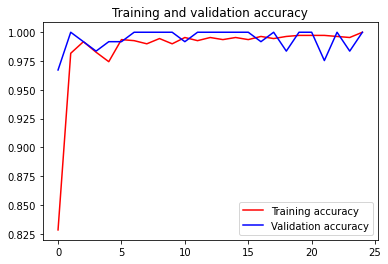

<Figure size 432x288 with 0 Axes>

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [30]:
model.save("spc1.h5")